## EJERCICIO 2

Este ejercicio es sobre an´alisis de t´opicos.

Un t´opico es una variable latente que representa o resume conceptos importantes de
un texto, como el significado o las ideas principales del mismo. Un t´opico, se conforma
por varias palabras relacionadas sem´anticamente entre si de acuerdo a cierto contexto.
En el ´area de procesamiento de lenguaje natural (NLP), forma parte de una tarea
general llamada recuperaci´on de informaci´on (IR). Para nosotros, desde la perspectiva
de machine learning, la consideraremos como una tarea de aprendizaje no-supervisado
a partir de una representaci´on vectorial particular de los textos.

In [5]:
conda install scipy


Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\nmari\Documents\PYTHON

  added / updated specs:
    - scipy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2024.3.11  |       haa95532_0         128 KB
    certifi-2024.2.2           |   py38haa95532_0         160 KB
    ------------------------------------------------------------
                                           Total:         289 KB

The following packages will be UPDATED:

  ca-certificates    conda-forge::ca-certificates-2023.7.2~ --> pkgs/main::ca-certificates-2024.3.11-haa95532_0 None
  certifi            conda-forge/noarch::certifi-2023.7.22~ --> pkgs/main/win-64::certifi-2024.2.2-py38haa95532_0 None




ca-certificates-2024 | 128 KB    |            |   0% 
ca-certificates-2024 | 128 KB    | #2         |  12% 
ca-certificates-2024 | 128 KB    | ########## | 1

In [2]:
from gensim.models import KeyedVectors

In [6]:
from my_functions import *

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nmari\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nmari\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
import glob, os, sys
import numpy as np
import pandas as pd
from my_functions import * 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

## CARGAR DATOS

In [7]:
import pandas as pd
import glob

# Define la ruta base donde buscar los archivos CSV de manera recursiva
base_path = "C:\\Users\\nmari\\Documents\\Ciencia de datos\\Tarea_3_NAM\\conferencias_matutinas_amlo-master\\conferencias_matutinas_amlo-master\\"

# Encuentra todos los archivos CSV que coinciden exactamente con "PRESIDENTE ANDRES MANUEL LOPEZ OBRADOR.csv" en todas las subcarpetas
path_reviews = glob.glob(base_path + '**/PRESIDENTE ANDRES MANUEL LOPEZ OBRADOR.csv', recursive=True)
path_reviews.sort()

# Carga cada archivo en un DataFrame y concatena todos en un único DataFrame
reviews = pd.concat([pd.read_csv(file) for file in path_reviews])
reviews.head(10)

,Participante,Texto,Sentimiento,Palabras,Dia,Mes,Anio
0,PRESIDENTE ANDRES MANUEL LOPEZ OBRADOR,: Buenos días. Ánimo.,0.541333,4,10,1,2019
1,PRESIDENTE ANDRES MANUEL LOPEZ OBRADOR,Hoy vamos a tratar dos temas y contestar como ...,0.541333,28,10,1,2019
2,PRESIDENTE ANDRES MANUEL LOPEZ OBRADOR,"Primero, informarles que hoy inicia el program...",0.541333,89,10,1,2019
3,PRESIDENTE ANDRES MANUEL LOPEZ OBRADOR,"Entonces, me da mucho gusto anunciar el día de...",0.541333,64,10,1,2019
4,PRESIDENTE ANDRES MANUEL LOPEZ OBRADOR,Lo importante también es que es un programa am...,0.541333,17,10,1,2019
5,PRESIDENTE ANDRES MANUEL LOPEZ OBRADOR,Nos da gusto anunciar el arranque de Jóvenes C...,0.541333,34,10,1,2019
6,PRESIDENTE ANDRES MANUEL LOPEZ OBRADOR,Se logró un presupuesto de 44 mil millones de ...,0.541333,34,10,1,2019
7,PRESIDENTE ANDRES MANUEL LOPEZ OBRADOR,Vamos a escuchar la exposición de Luisa María ...,0.541333,12,10,1,2019
8,PRESIDENTE ANDRES MANUEL LOPEZ OBRADOR,"Después de tratar este tema, vamos también a i...",0.541333,36,10,1,2019
9,PRESIDENTE ANDRES MANUEL LOPEZ OBRADOR,Adelanto que le agradezco mucho a la gente tod...,0.541333,116,10,1,2019


In [8]:
print(reviews.columns)

# Opcional: verifica los tipos de datos de estas columnas
print(reviews[['Anio', 'Mes', 'Dia']].dtypes)

# Opcional: revisa si hay valores nulos en estas columnas
print(reviews[['Anio', 'Mes', 'Dia']].isnull().sum())

Index(['Participante', 'Texto', 'Sentimiento', 'Palabras', 'Dia', 'Mes',
       'Anio'],
      dtype='object')
Anio    int64
Mes     int64
Dia     int64
dtype: object
Anio    0
Mes     0
Dia     0
dtype: int64


In [9]:
import pandas as pd

reviews['Fecha'] = pd.to_datetime(reviews['Anio'].astype(str) + '-' +
                                  reviews['Mes'].astype(str) + '-' +
                                  reviews['Dia'].astype(str), format='%Y-%m-%d')
reviews['Fecha_Columna'] = reviews['Fecha']
reviews.set_index('Fecha', inplace=True)
# Agrupar por semana y concatenar textos
dff = reviews.resample('W').agg({
    'Texto': lambda x: ' '.join(x)  # Concatena todos los textos de la semana
})
dff['Fecha'] = dff.index
dff

,Texto,Fecha
Fecha,,
2019-01-06,": Buenos días. Primero, reiterar nuestra manif...",2019-01-06
2019-01-13,: Buenos días. Estamos terminando el periodo c...,2019-01-13
2019-01-20,: Buenos días. El día de hoy vamos a informar ...,2019-01-20
2019-01-27,: Buenos días. Vamos a informar sobre el plan ...,2019-01-27
2019-02-03,: Buenos días. Vamos a informar y al mismo tie...,2019-02-03
...,...,...
2023-12-03,"Buenos días-tarde-noches. Ánimo. Bueno, pues ...",2023-12-03
2023-12-10,"Buenos días. ¿Cómo están? Ánimo, ánimo. Vamos...",2023-12-10
2023-12-17,"Buenos días. Ánimo, ánimo. Ya empezó el frío ...",2023-12-17


In [10]:
texto_fila_3 = dff.iloc[0]['Texto']
print(texto_fila_3)


: Buenos días. Primero, reiterar nuestra manifestación, nuestro deseo de que este año sea mejor que el año pasado y que otros años. Yo pienso que nos va a ir muy bien este año, estoy optimista, porque, lo mencioné ayer, hay condiciones inmejorables para conseguir que mejore la economía del país, que haya crecimiento en la economía, que se generen empleos como nunca, que la gente tenga trabajo, que haya buenos salarios, que mejoren las condiciones de vida; es decir, que se garantice el derecho a la educación, a la salud y que se consiga la paz en el país. Estamos trabajando con ese propósito y vamos bien. En la primera conferencia matutina del año presentamos la Convocatoria de reclutamiento de jóvenes para su integración a la Guardia Nacional.Invitamos a las y los jóvenes de México mayores de 18 años a contribuir en esta importante labor de la seguridad pública nacional con adiestramiento policial especializado y sólida capacitación en respeto a los derechos humanos. Ya iniciaron los c

In [11]:
dff['Fecha'] = pd.to_datetime(dff['Fecha'], errors='coerce', format='%Y-%m-%d')


In [12]:
dff.columns

Index(['Texto', 'Fecha'], dtype='object')

## PREPROCESAMIENTO

In [13]:
from my_functions import preprocesaTexto  
# Crear instancia de preprocesamiento para español
preprocessor = preprocesaTexto(
    idioma='es',
    _aMinusculas=True,
    _removerPuntuacion=True,
    _quitarNumeros=True, 
    _lematiza=True,
    _remueveStop=True
)
# Aplicar preprocesamiento a la columna de texto
dff['Texto_Procesado'] = dff['Texto'].apply(preprocessor.preprocesa)


In [17]:
dff

,Texto,Fecha,Texto_Procesado
Fecha,,,
2019-01-06,": Buenos días. Primero, reiterar nuestra manif...",2019-01-06,buen día primero reiterar manifestación desear...
2019-01-13,: Buenos días. Estamos terminando el periodo c...,2019-01-13,buen día terminar periodo conocido guadalupere...
2019-01-20,: Buenos días. El día de hoy vamos a informar ...,2019-01-20,buen día día hoy ir informar plan combatir rob...
2019-01-27,: Buenos días. Vamos a informar sobre el plan ...,2019-01-27,buen día ir informar plan general combatir rob...
2019-02-03,: Buenos días. Vamos a informar y al mismo tie...,2019-02-03,buen día ir informar mismo tiempo contestar pr...
...,...,...,...
2023-12-03,"Buenos días-tarde-noches. Ánimo. Bueno, pues ...",2023-12-03,buen díastardenoch ánimo bueno pues ir ainicia...
2023-12-10,"Buenos días. ¿Cómo están? Ánimo, ánimo. Vamos...",2023-12-10,buen día cómo ánimo ánimo ir lunes informar qu...
2023-12-17,"Buenos días. Ánimo, ánimo. Ya empezó el frío ...",2023-12-17,buen día ánimo ánimo empezar frío lluvia bueno...


In [18]:
dff.to_csv('TextoProcesado1.csv', index=False)

In [180]:
# Imprimir los valores de la primera fila de las columnas 'Texto' y 'Texto_Procesado'
print("Texto Original: ", df['Texto'].iloc[0])
print("Texto Procesado: ", df['Texto_Procesado'].iloc[0])


Texto Original:  : Buenos días. Primero, reiterar nuestra manifestación, nuestro deseo de que este año sea mejor que el año pasado y que otros años. Yo pienso que nos va a ir muy bien este año, estoy optimista, porque, lo mencioné ayer, hay condiciones inmejorables para conseguir que mejore la economía del país, que haya crecimiento en la economía, que se generen empleos como nunca, que la gente tenga trabajo, que haya buenos salarios, que mejoren las condiciones de vida; es decir, que se garantice el derecho a la educación, a la salud y que se consiga la paz en el país. Estamos trabajando con ese propósito y vamos bien. En la primera conferencia matutina del año presentamos la Convocatoria de reclutamiento de jóvenes para su integración a la Guardia Nacional.Invitamos a las y los jóvenes de México mayores de 18 años a contribuir en esta importante labor de la seguridad pública nacional con adiestramiento policial especializado y sólida capacitación en respeto a los derechos humanos. Y

## ANALISIS DE TOPICOS

In [19]:
import pandas as pd
df = pd.read_csv('TextoProcesado1.csv')
df

,Texto,Fecha,Texto_Procesado
0,": Buenos días. Primero, reiterar nuestra manif...",2019-01-06,buen día primero reiterar manifestación desear...
1,: Buenos días. Estamos terminando el periodo c...,2019-01-13,buen día terminar periodo conocido guadalupere...
2,: Buenos días. El día de hoy vamos a informar ...,2019-01-20,buen día día hoy ir informar plan combatir rob...
3,: Buenos días. Vamos a informar sobre el plan ...,2019-01-27,buen día ir informar plan general combatir rob...
4,: Buenos días. Vamos a informar y al mismo tie...,2019-02-03,buen día ir informar mismo tiempo contestar pr...
...,...,...,...
256,"Buenos días-tarde-noches. Ánimo. Bueno, pues ...",2023-12-03,buen díastardenoch ánimo bueno pues ir ainicia...
257,"Buenos días. ¿Cómo están? Ánimo, ánimo. Vamos...",2023-12-10,buen día cómo ánimo ánimo ir lunes informar qu...
258,"Buenos días. Ánimo, ánimo. Ya empezó el frío ...",2023-12-17,buen día ánimo ánimo empezar frío lluvia bueno...
259,"Buenos, días. Ánimo. Vamos a informar sobre ‘...",2023-12-24,buen día ánimo ir informar quién quién precio ...


In [20]:
print(df.columns)

Index(['Texto', 'Fecha', 'Texto_Procesado'], dtype='object')


In [21]:
df['Fecha'] = pd.to_datetime(df['Fecha'], errors='coerce', format='%Y-%m-%d')

In [22]:
df
    

,Texto,Fecha,Texto_Procesado
0,": Buenos días. Primero, reiterar nuestra manif...",2019-01-06,buen día primero reiterar manifestación desear...
1,: Buenos días. Estamos terminando el periodo c...,2019-01-13,buen día terminar periodo conocido guadalupere...
2,: Buenos días. El día de hoy vamos a informar ...,2019-01-20,buen día día hoy ir informar plan combatir rob...
3,: Buenos días. Vamos a informar sobre el plan ...,2019-01-27,buen día ir informar plan general combatir rob...
4,: Buenos días. Vamos a informar y al mismo tie...,2019-02-03,buen día ir informar mismo tiempo contestar pr...
...,...,...,...
256,"Buenos días-tarde-noches. Ánimo. Bueno, pues ...",2023-12-03,buen díastardenoch ánimo bueno pues ir ainicia...
257,"Buenos días. ¿Cómo están? Ánimo, ánimo. Vamos...",2023-12-10,buen día cómo ánimo ánimo ir lunes informar qu...
258,"Buenos días. Ánimo, ánimo. Ya empezó el frío ...",2023-12-17,buen día ánimo ánimo empezar frío lluvia bueno...
259,"Buenos, días. Ánimo. Vamos a informar sobre ‘...",2023-12-24,buen día ánimo ir informar quién quién precio ...


In [23]:
# Opcional: revisa si hay valores nulos en estas columnas
print(df[['Texto_Procesado']].isnull().sum())

Texto_Procesado    2
dtype: int64


In [24]:
# Eliminar filas donde 'Texto_Procesado' es NaN
df = df.dropna(subset=['Texto_Procesado'])

In [25]:
#Documendo con el texto procesado por semanas de AMLO
df

,Texto,Fecha,Texto_Procesado
0,": Buenos días. Primero, reiterar nuestra manif...",2019-01-06,buen día primero reiterar manifestación desear...
1,: Buenos días. Estamos terminando el periodo c...,2019-01-13,buen día terminar periodo conocido guadalupere...
2,: Buenos días. El día de hoy vamos a informar ...,2019-01-20,buen día día hoy ir informar plan combatir rob...
3,: Buenos días. Vamos a informar sobre el plan ...,2019-01-27,buen día ir informar plan general combatir rob...
4,: Buenos días. Vamos a informar y al mismo tie...,2019-02-03,buen día ir informar mismo tiempo contestar pr...
...,...,...,...
256,"Buenos días-tarde-noches. Ánimo. Bueno, pues ...",2023-12-03,buen díastardenoch ánimo bueno pues ir ainicia...
257,"Buenos días. ¿Cómo están? Ánimo, ánimo. Vamos...",2023-12-10,buen día cómo ánimo ánimo ir lunes informar qu...
258,"Buenos días. Ánimo, ánimo. Ya empezó el frío ...",2023-12-17,buen día ánimo ánimo empezar frío lluvia bueno...
259,"Buenos, días. Ánimo. Vamos a informar sobre ‘...",2023-12-24,buen día ánimo ir informar quién quién precio ...


In [91]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nmari\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [92]:
from nltk.corpus import stopwords
spanish_stopwords = stopwords.words('spanish')

max_df=0.8: Se excluyen términos que aparecen en más del 80 de los documentos, lo que ayuda a descartar palabras comunes que no son útiles para identificar tópicos específicos.

min_df=2: Se excluyen términos que aparecen en menos de dos documentos para evitar incluir palabras demasiado raras que no contribuyan significativamente a la identificación de tópicos.

max_features=1000: Limita el vocabulario a las 1000 palabras más importantes para enfocarse en los términos más relevantes y mantener el modelo manejable y eficiente.

stop_words='spanish': Elimina palabras comunes del idioma español que tienen poca relevancia en el análisis.

In [94]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Configurar el TfidfVectorizer con las stopwords de NLTK
tfidf_vectorizer = TfidfVectorizer(max_df=0.85, min_df=2, max_features=1000, stop_words=spanish_stopwords)

# Ajustar y transformar los documentos procesados
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Texto_Procesado'])
words = tfidf_vectorizer.get_feature_names()


In [1]:
words

NameError: name 'words' is not defined

In [95]:
# Crear un DataFrame para la visualización de la matriz TF-IDF
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=words)
tfidf_df


,abandonado,abandonar,abandono,abasto,abrazo,abril,abrimo,absolutamente,absoluto,abuso,...,zoé,zócalo,ángel,ánimo,árbol,área,élite,ético,íntegro,órden
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.047243,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.090279,0.025395,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.013520,0.007828,0.183169,0.000000,0.000000,0.007995,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.007327,0.006733,0.000000,0.008346,0.000000,0.008029,0.000000,0.000000
2,0.010128,0.012791,0.004937,0.198708,0.004815,0.000000,0.005043,0.004896,0.004775,0.000000,...,0.000000,0.000000,0.000000,0.004247,0.000000,0.015791,0.000000,0.005064,0.000000,0.000000
3,0.019477,0.049197,0.018989,0.186618,0.000000,0.000000,0.019394,0.009415,0.045917,0.017416,...,0.000000,0.000000,0.000000,0.000000,0.017993,0.040490,0.000000,0.000000,0.000000,0.000000
4,0.024486,0.051541,0.011936,0.111720,0.000000,0.013851,0.012191,0.000000,0.011545,0.000000,...,0.000000,0.000000,0.000000,0.010267,0.011310,0.000000,0.014044,0.024486,0.011788,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254,0.006445,0.000000,0.000000,0.017645,0.000000,0.000000,0.006418,0.012463,0.012156,0.000000,...,0.000000,0.020910,0.017645,0.027027,0.035725,0.073695,0.022180,0.000000,0.037234,0.014002
255,0.000000,0.009874,0.000000,0.010701,0.011151,0.026534,0.000000,0.011338,0.033177,0.020972,...,0.063407,0.012681,0.021403,0.078678,0.000000,0.000000,0.000000,0.011727,0.011291,0.012738
256,0.008179,0.013774,0.003987,0.003732,0.003889,0.004627,0.000000,0.027679,0.007713,0.007314,...,0.000000,0.022112,0.011196,0.024008,0.007556,0.068016,0.000000,0.020449,0.015750,0.022211
257,0.000000,0.025686,0.000000,0.037119,0.019339,0.000000,0.010126,0.019664,0.009590,0.018186,...,0.010997,0.010997,0.000000,0.025585,0.028183,0.010570,0.011665,0.000000,0.019582,0.022091


In [96]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [13]:
?WordCloud

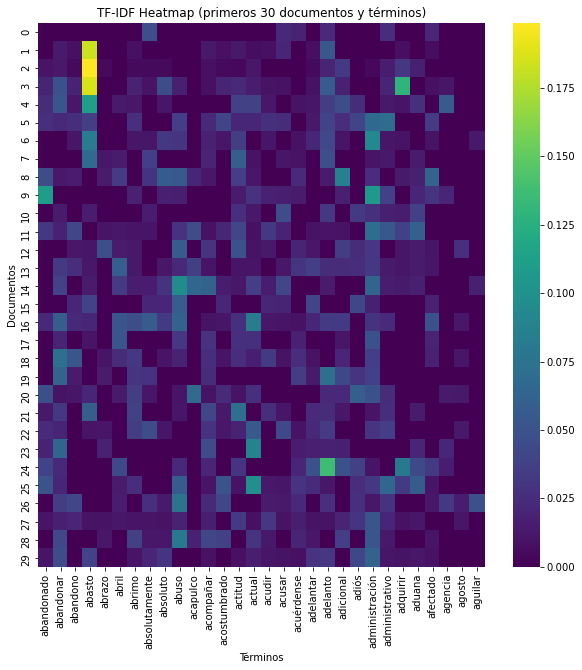

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 10))  # Ajusta el tamaño según tus necesidades

# Crear un heatmap usando seaborn
sns.heatmap(tfidf_df.iloc[:30, :30], annot=False, cmap='viridis', cbar=True)

plt.title('TF-IDF Heatmap (primeros 30 documentos y términos)')
plt.xlabel('Términos')
plt.ylabel('Documentos')
plt.show()


##  INCISO B. Descomposición SVD

In [98]:
from sklearn.decomposition import TruncatedSVD

# Elegir un k adecuado
num_topics = 6
svd_model = TruncatedSVD(n_components=num_topics, n_iter=100, random_state=42)
svd_matrix = svd_model.fit_transform(tfidf_matrix)


In [99]:
svd_matrix

array([[ 0.43982608, -0.10764028,  0.25170048, -0.17738202,  0.16278498,
        -0.0790341 ],
       [ 0.29399079, -0.05665498,  0.25202604, -0.25372448,  0.24738702,
         0.14001794],
       [ 0.24706454, -0.05493823,  0.22061726, -0.20888993,  0.25044733,
         0.20215487],
       ...,
       [ 0.57916433, -0.1819702 , -0.27039883,  0.19127358,  0.38157569,
         0.10378943],
       [ 0.53485555, -0.09985959, -0.18140862,  0.13775719,  0.40914666,
         0.04727734],
       [ 0.6182592 , -0.11894653, -0.1184071 ,  0.05022945,  0.15179309,
        -0.09608246]])

In [100]:
print("Porcentaje de varianza explicada por cada componente:")
print(svd_model.explained_variance_ratio_)
print("Varianza total explicada:", sum(svd_model.explained_variance_ratio_))


Porcentaje de varianza explicada por cada componente:
[0.00911731 0.06000416 0.04758699 0.02812878 0.02329061 0.02104722]
Varianza total explicada: 0.1891750768371458


In [101]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [103]:
def plot_word_clouds(model, feature_names, num_words=30):
    for idx, topic in enumerate(model.components_):
        # Extraer las n palabras más importantes para el tópico
        top_features_ind = topic.argsort()[-num_words:][::-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        # Crear un diccionario de palabra-peso
        word_dict = dict(zip(top_features, weights))

        wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_dict)
        
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.title(f"Word Cloud para Tópico {idx+1}")
        plt.show()

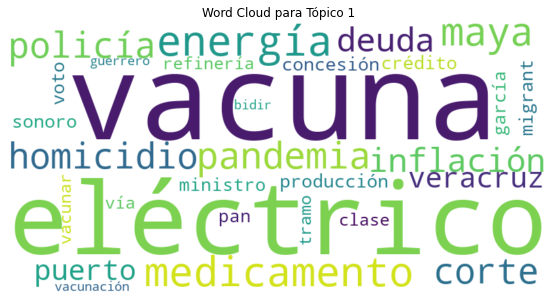

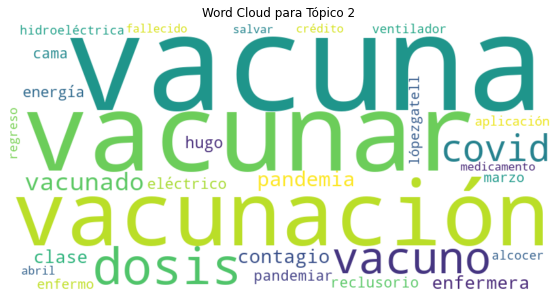

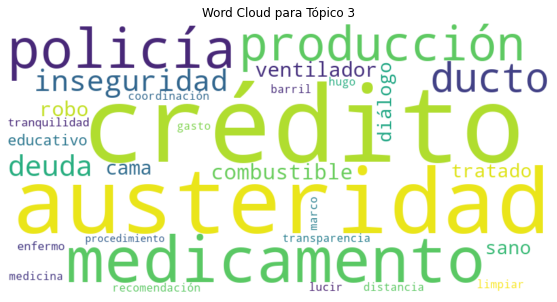

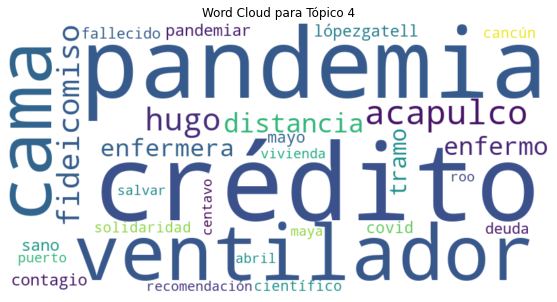

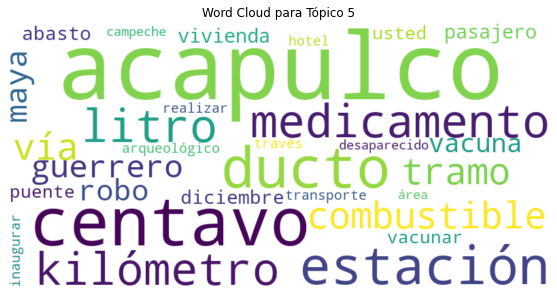

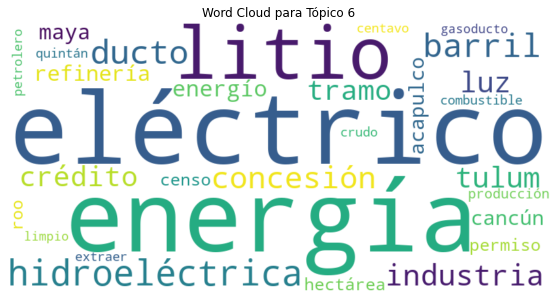

In [104]:
# Obtener nombres de características (palabras) y generar word clouds
#feature_names = tfidf_vectorizer.get_feature_names()
plot_word_clouds(svd_model, words)

## Representación correspondiente de cada una de las conferencias del presidente

In [105]:
# Asignar a cada documento el tópico con la mayor contribución
dominant_topic = np.argmax(svd_matrix, axis=1)
df['Dominant_Topic'] = dominant_topic


<ipython-input-105-b55c9cc59c4f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Dominant_Topic'] = dominant_topic


In [106]:
from sklearn.decomposition import PCA

# Aplicar PCA para reducir a 2 dimensiones
pca = PCA(n_components=4)
pca_result = pca.fit_transform(svd_matrix)

df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]
df['PCA3'] = pca_result[:, 2]
df['PCA4'] = pca_result[:, 3]

<ipython-input-106-b82fc309b743>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PCA1'] = pca_result[:, 0]
<ipython-input-106-b82fc309b743>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PCA2'] = pca_result[:, 1]
<ipython-input-106-b82fc309b743>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

In [107]:
from sklearn.decomposition import KernelPCA

# Aplicar Kernel PCA para reducir a 2 dimensiones
kernel_pca = KernelPCA(n_components=4, kernel='rbf')
kernel_pca_result = kernel_pca.fit_transform(svd_matrix)

df['KernelPCA1'] = kernel_pca_result[:, 0]
df['KernelPCA2'] = kernel_pca_result[:, 1]
df['KernelPCA3'] = kernel_pca_result[:, 2]
df['KernelPCA4'] = kernel_pca_result[:, 3]


<ipython-input-107-eea30a68e007>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['KernelPCA1'] = kernel_pca_result[:, 0]
<ipython-input-107-eea30a68e007>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['KernelPCA2'] = kernel_pca_result[:, 1]
<ipython-input-107-eea30a68e007>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

In [108]:
from sklearn.manifold import TSNE

# Aplicar t-SNE para reducir a 2 dimensiones
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(svd_matrix)

df['TSNE1'] = tsne_result[:, 0]
df['TSNE2'] = tsne_result[:, 1]

<ipython-input-108-81a8da389298>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TSNE1'] = tsne_result[:, 0]
<ipython-input-108-81a8da389298>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TSNE2'] = tsne_result[:, 1]


In [109]:
import matplotlib.pyplot as plt

# Función para plotear los resultados
def plot_embedding(data, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(data[:, 0], data[:, 1], c=df['Dominant_Topic'], cmap='viridis', s=50, alpha=0.6)
    plt.colorbar()
    plt.title(title)
    plt.grid(True)
    plt.show()

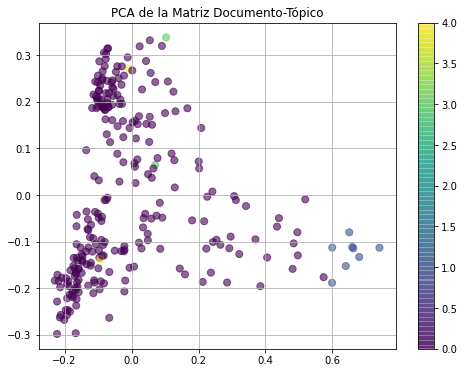

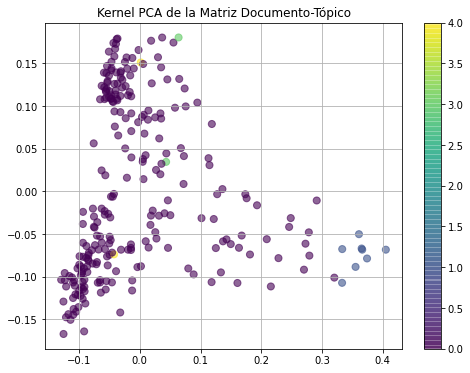

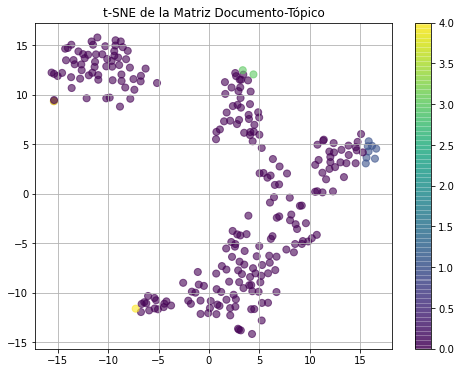

In [111]:
# Ploteo PCA
plot_embedding(pca_result, "PCA de la Matriz Documento-Tópico")

# Ploteo Kernel PCA
plot_embedding(kernel_pca_result, "Kernel PCA de la Matriz Documento-Tópico")

# Ploteo t-SNE
plot_embedding(tsne_result, "t-SNE de la Matriz Documento-Tópico")


## Ejercicio D


In [112]:
from sklearn.decomposition import NMF

In [113]:
# Configuración de NMF
nmf_model = NMF(n_components=6, random_state=42)  # Ajusta n_components según tus necesidades

# Aplicar NMF a la matriz TF-IDF
W = nmf_model.fit_transform(tfidf_matrix)
H = nmf_model.components_
H

C:\Users\nmari\Documents\PYTHON\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


array([[0.02615465, 0.06369989, 0.03483968, ..., 0.02945355, 0.03961532,
        0.05837124],
       [0.00968383, 0.01450325, 0.0096186 , ..., 0.03255432, 0.02644128,
        0.00373431],
       [0.04920706, 0.07360765, 0.041717  , ..., 0.05391282, 0.02967142,
        0.02159435],
       [0.03443174, 0.02482019, 0.01582981, ..., 0.02669516, 0.03291646,
        0.01267883],
       [0.        , 0.00896735, 0.00204532, ..., 0.00360996, 0.02014505,
        0.02843316],
       [0.02547856, 0.01512104, 0.01662446, ..., 0.04006089, 0.01615501,
        0.02206202]])

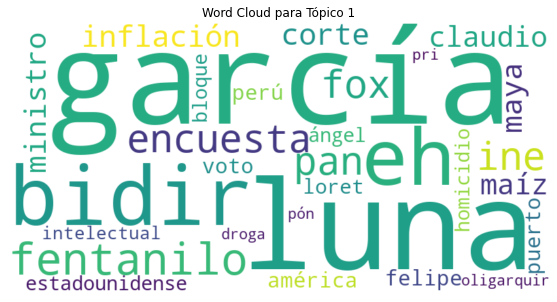

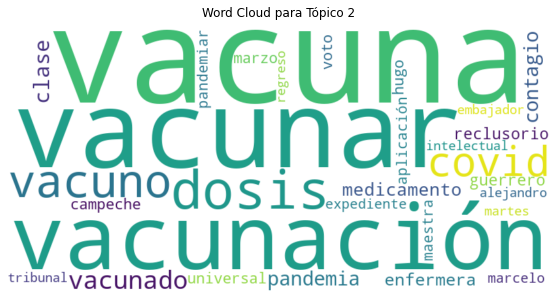

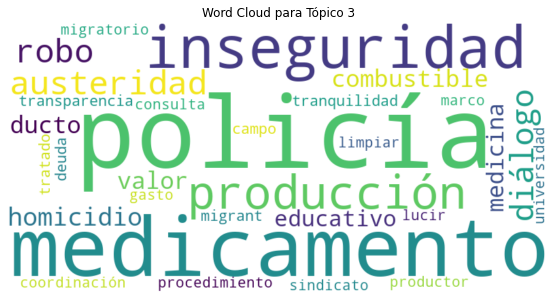

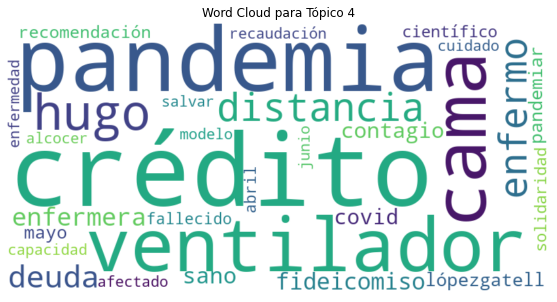

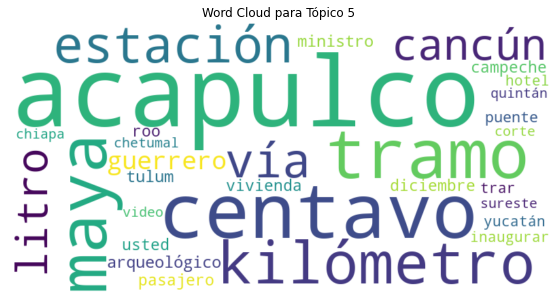

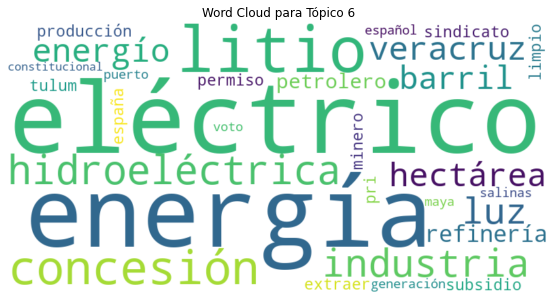

In [114]:
plot_word_clouds(nmf_model, words)

In [115]:
# Asumiendo que nmf_model es tu modelo NMF ya ajustado y tfidf_matrix tu matriz TF-IDF
documento_topico_matriz = nmf_model.transform(tfidf_matrix)

In [116]:
import numpy as np

# Asignar cada documento a su tópico dominante
topicos_dominantes = np.argmax(documento_topico_matriz, axis=1)

# Crear un DataFrame para almacenar los resultados
df_topicos = pd.DataFrame({
    'Conferencia': range(len(topicos_dominantes)),
    'Tópico Dominante': topicos_dominantes
})


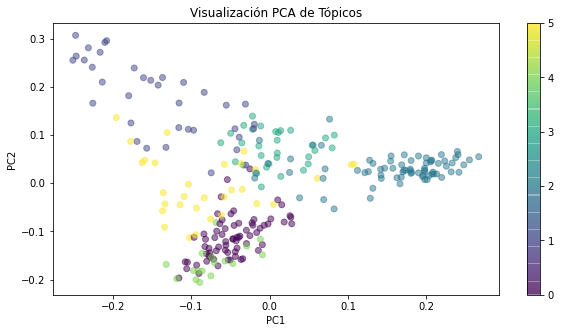

In [117]:
pca = PCA(n_components=2)
pca_resultados = pca.fit_transform(documento_topico_matriz)

plt.figure(figsize=(10, 5))
plt.scatter(pca_resultados[:, 0], pca_resultados[:, 1], c=topicos_dominantes, cmap='viridis', alpha=0.5)
plt.colorbar()
plt.title('Visualización PCA de Tópicos')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


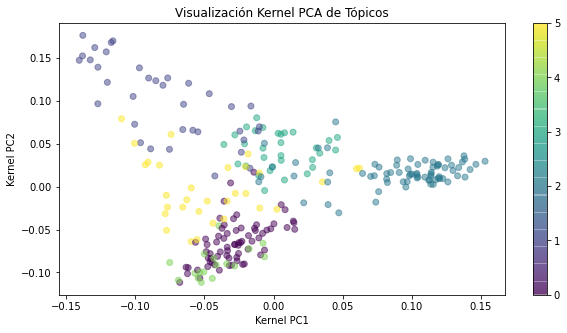

In [118]:
kernel_pca = KernelPCA(n_components=2, kernel='rbf')  # Puedes probar diferentes kernels
kernel_pca_resultados = kernel_pca.fit_transform(documento_topico_matriz)

plt.figure(figsize=(10, 5))
plt.scatter(kernel_pca_resultados[:, 0], kernel_pca_resultados[:, 1], c=topicos_dominantes, cmap='viridis', alpha=0.5)
plt.colorbar()
plt.title('Visualización Kernel PCA de Tópicos')
plt.xlabel('Kernel PC1')
plt.ylabel('Kernel PC2')
plt.show()


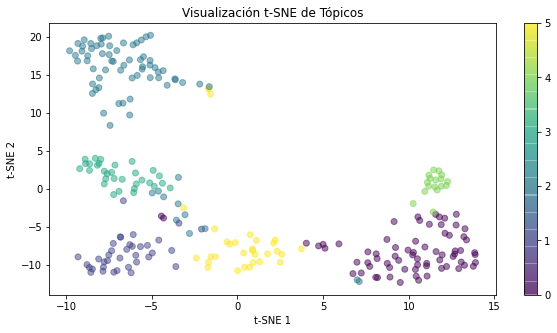

In [119]:
tsne = TSNE(n_components=2, random_state=42)
tsne_resultados = tsne.fit_transform(documento_topico_matriz)

plt.figure(figsize=(10, 5))
plt.scatter(tsne_resultados[:, 0], tsne_resultados[:, 1], c=topicos_dominantes, cmap='viridis', alpha=0.5)
plt.colorbar()
plt.title('Visualización t-SNE de Tópicos')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.show()


## INCISO E

In [120]:
df

,Texto,Fecha,Texto_Procesado,Dominant_Topic,PCA1,PCA2,PCA3,PCA4,KernelPCA1,KernelPCA2,KernelPCA3,KernelPCA4,TSNE1,TSNE2
0,": Buenos días. Primero, reiterar nuestra manif...",2019-01-06,buen día primero reiterar manifestación desear...,0,-0.080027,0.276409,-0.166841,0.195638,-0.041884,0.158310,-0.093241,0.109414,-12.124597,9.640079
1,: Buenos días. Estamos terminando el periodo c...,2019-01-13,buen día terminar periodo conocido guadalupere...,0,-0.011499,0.295306,-0.234822,0.314066,-0.002017,0.165774,-0.128556,0.172497,-15.360373,9.361561
2,: Buenos días. El día de hoy vamos a informar ...,2019-01-20,buen día día hoy ir informar plan combatir rob...,4,-0.005702,0.270777,-0.187949,0.328620,0.001557,0.151208,-0.102708,0.180229,-15.370512,9.333693
3,: Buenos días. Vamos a informar sobre el plan ...,2019-01-27,buen día ir informar plan general combatir rob...,0,-0.028896,0.275963,-0.194051,0.288020,-0.012230,0.156437,-0.107802,0.159056,-15.351034,9.465776
4,: Buenos días. Vamos a informar y al mismo tie...,2019-02-03,buen día ir informar mismo tiempo contestar pr...,0,-0.075948,0.302468,-0.200763,0.173032,-0.039257,0.172984,-0.112262,0.096430,-14.249995,14.641121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256,"Buenos días-tarde-noches. Ánimo. Bueno, pues ...",2023-12-03,buen díastardenoch ánimo bueno pues ir ainicia...,0,-0.165217,-0.237334,0.159387,0.314506,-0.089701,-0.131432,0.088712,0.181830,-5.380192,-11.565084
257,"Buenos días. ¿Cómo están? Ánimo, ánimo. Vamos...",2023-12-10,buen día cómo ánimo ánimo ir lunes informar qu...,0,-0.157156,-0.158327,0.120809,0.309400,-0.086695,-0.087914,0.067615,0.178200,-5.401928,-10.508125
258,"Buenos días. Ánimo, ánimo. Ya empezó el frío ...",2023-12-17,buen día ánimo ánimo empezar frío lluvia bueno...,0,-0.190209,-0.246871,0.210592,0.381175,-0.101053,-0.135663,0.116471,0.219507,-5.928317,-11.764783
259,"Buenos, días. Ánimo. Vamos a informar sobre ‘...",2023-12-24,buen día ánimo ir informar quién quién precio ...,0,-0.099118,-0.157339,0.158570,0.414269,-0.052854,-0.086735,0.088154,0.236360,-6.208408,-11.051867


In [121]:
# Asumiendo que 'documento_topico_matriz' es la matriz obtenida de NMF.transform()
df_topicos = pd.DataFrame(documento_topico_matriz, columns=[f'Tópico {i+1}' for i in range(nmf_model.n_components)])

# Agregar la fecha al DataFrame de tópicos
df_topicos['Fecha'] = df['Fecha']

# Agrupar por semana y sumar la importancia de cada tópico
df_topicos_semanales = df_topicos.resample('W', on='Fecha').sum()


In [122]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_topicos_semanales_norm = pd.DataFrame(
    scaler.fit_transform(df_topicos_semanales),
    index=df_topicos_semanales.index,
    columns=df_topicos_semanales.columns
)


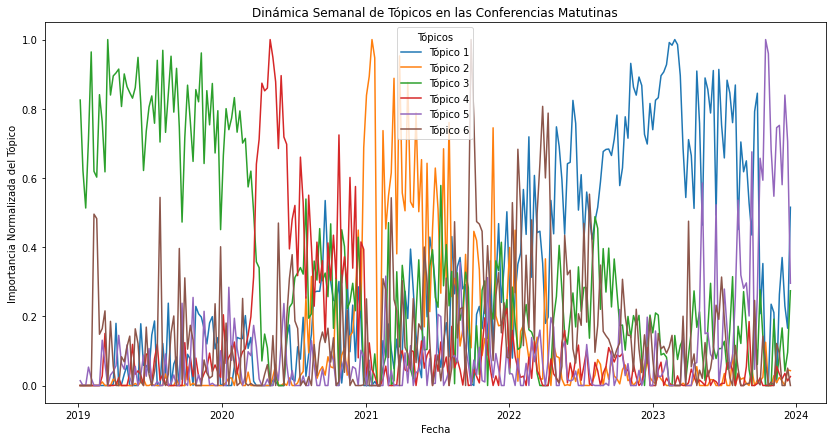

In [123]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
for column in df_topicos_semanales_norm.columns:
    plt.plot(df_topicos_semanales_norm.index, df_topicos_semanales_norm[column], label=column)

plt.title('Dinámica Semanal de Tópicos en las Conferencias Matutinas')
plt.xlabel('Fecha')
plt.ylabel('Importancia Normalizada del Tópico')
plt.legend(title='Tópicos')
plt.show()
